<a href="https://colab.research.google.com/github/mch60131242/Home/blob/main/Decision_Tree_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()  ## 0= red 1= white 개념적으로 1을 맞추는 관례이므로  화이트 와인을 찾는 이진 분류 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()
wine.describe( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target =train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [5]:
#print(train_input.shape,test_input.shape)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])


[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]]


In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [7]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8569230769230769


In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#plt.figure(figsize=(10,7)) ## matplotlib으로 사이즈 지정
#plot_tree(dt) ## sklearn의 그리기 방식을통해 plt위에다가 그림을 그리기
#plt.show()

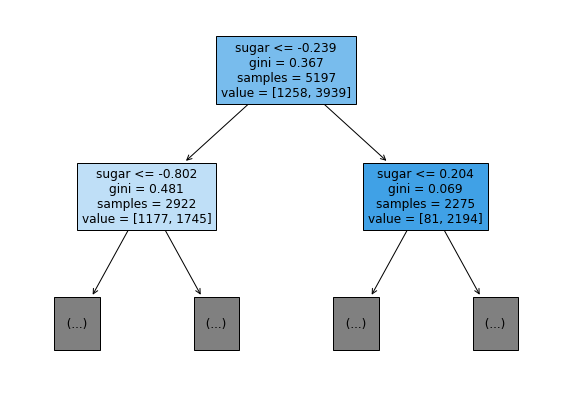

In [11]:
plt.figure(figsize=(10,7)) ## matplotlib으로 사이즈 지정
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH']) ## 특성의 이름을 정해주는 이유는 우리가 처음에 numpy로 만들어서 이름이 없는 상태로 숫자로만 특성이 이루어 졌기 때문
plt.show()

In [13]:
dt =DecisionTreeClassifier(max_depth =3, random_state =42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


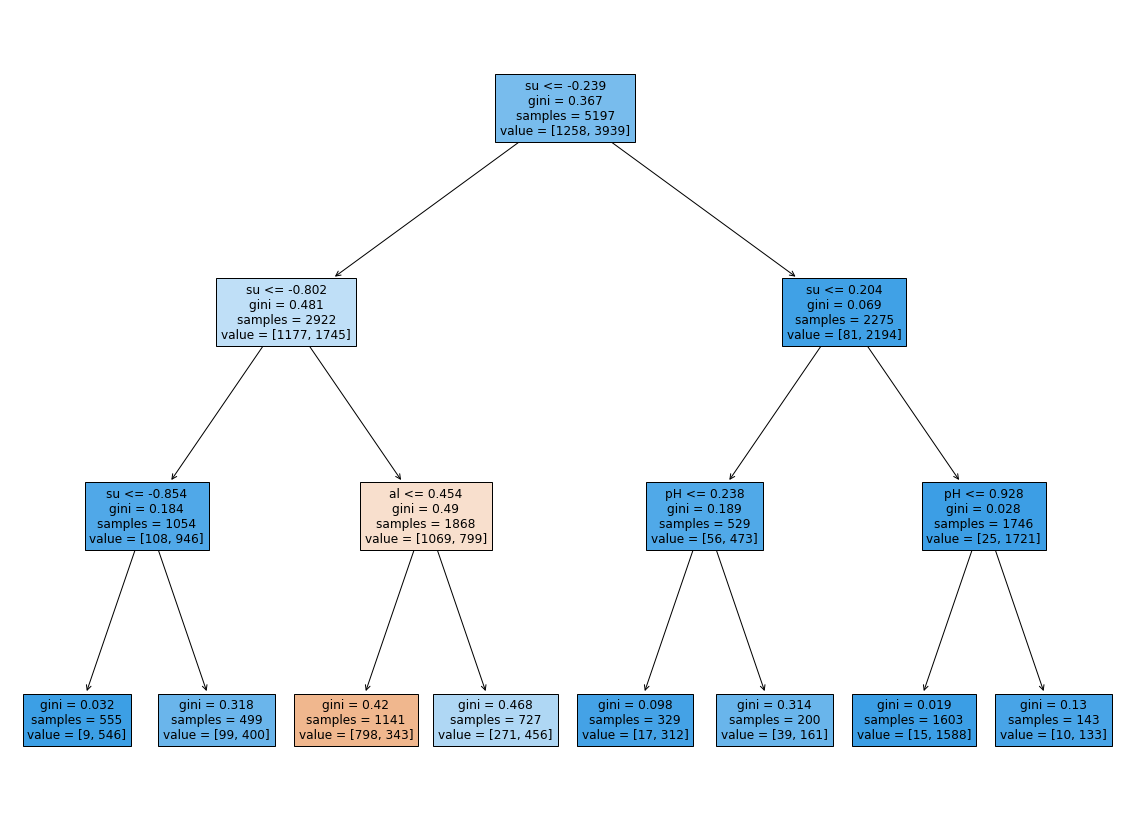

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = ['al','su','pH'])
plt.show()

0.8454877814123533
0.8415384615384616


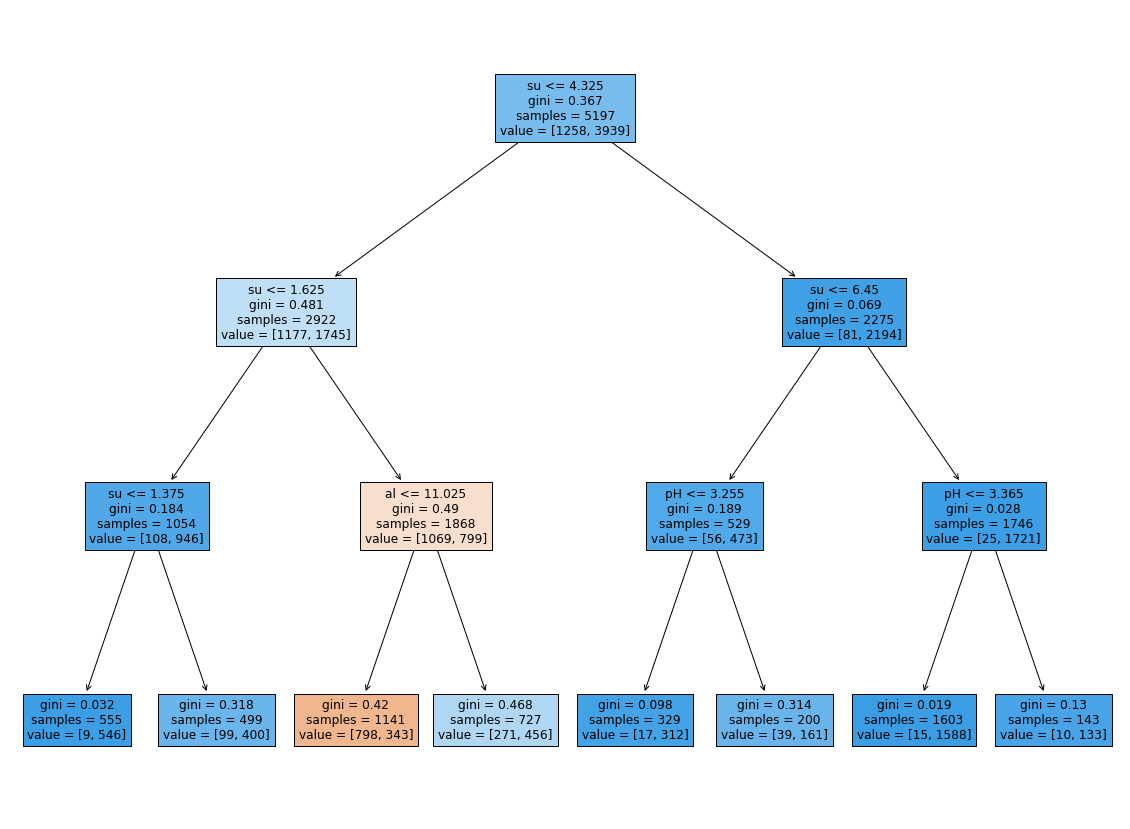

In [17]:
dt =DecisionTreeClassifier(max_depth =3, random_state =42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = ['al','su','pH'])
plt.show()

In [18]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


0.8454877814123533
0.8415384615384616


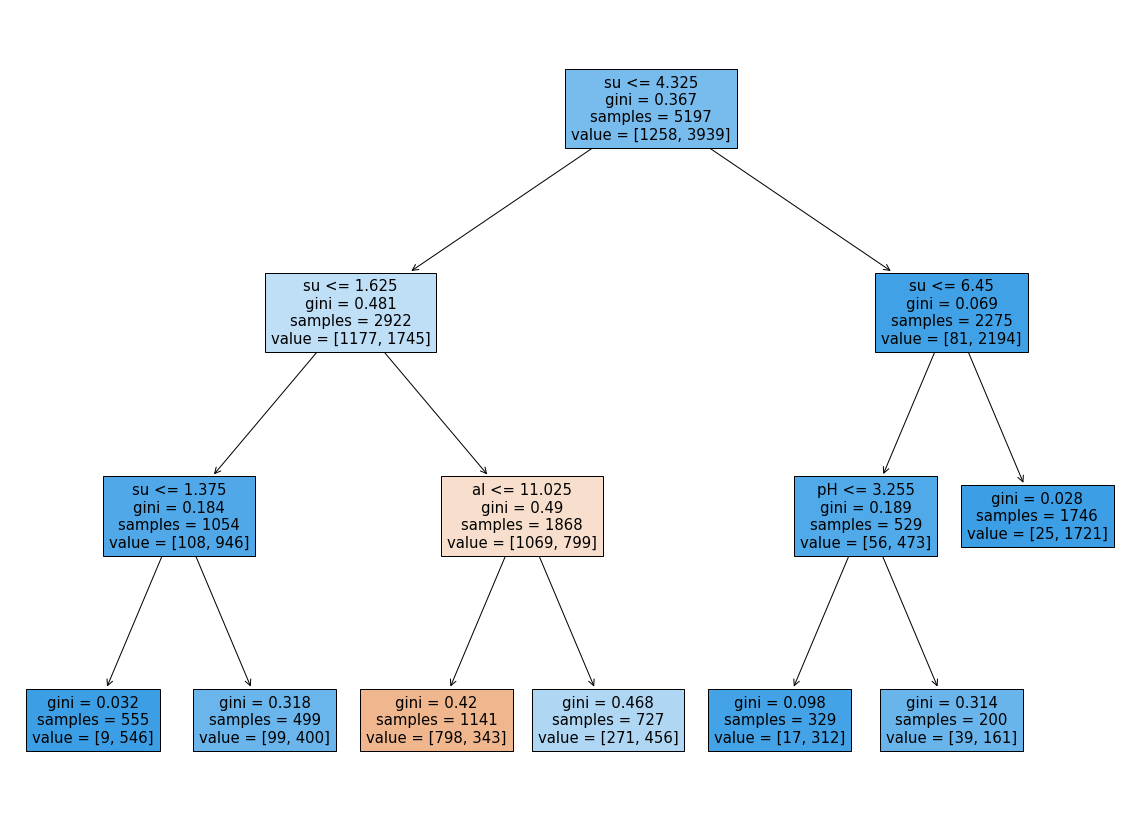

In [23]:
dt =DecisionTreeClassifier(min_impurity_decrease=0.0005 ,max_depth=3, random_state = 42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = ['al','su','pH'])
plt.show()